#  Monte Carlo

Name: Arthur Pontes Nader

#### I will pretend I know, until I have enough data to understand

## Libraries

In [1]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

## The uniform distribution

In practically all known methods to generate random nummbers, a random variable U is generated from a uniform distribution over the interval (0, 1). That is, U is a number chosen randomly from (0, 1) with uniform density. Next, they transform U in order to obtain a variable with the desired distribution.

You can generated a "random" value between 0 and 1 using the function:

In [13]:
np.random.random()

0.8038488241152093

Think a little: how can we generate a random value between 0 and 2?

In [14]:
2*np.random.random()

1.6297888692020968

And between 4 and 5?

In [15]:
4 + np.random.random()

4.381491102988664

And between 0.25 and 0.75?

In [16]:
0.25 + 0.5 * np.random.random()

0.3059181751263673

I hope you got the idea

## Generating a Bernoulli

Let $X \sim Bernoulli(\theta)$, with $P(X=1) = \theta$ and $P(X=0) = 1 - \theta$

In [59]:
theta = 0.35

We can use the uniform to generate values that following this distribution in such way: select a value from $\sim U(0,1)$ If the value is less or equal 0.35, return 1. Else, return 0.

In [60]:
def bernoulli(theta):
    
    if np.random.random() <= theta:
        return 1
    else:
        return 0

In [61]:
bernoulli(theta)

1

## Generating a Binomial

To generate a binomial $Y \sim Binomial(\theta, n)$ you have just repeat the $X \sim Bernoulli(\theta)$ n times

In [69]:
def binomial(theta, n):
    
    sample = np.random.random(n)
    
    return np.sum((sample < theta).astype(int))

In [70]:
binomial(theta, 100)

34

## Generating an arbitrary discrete random variable

Suppose the following distribution:

In [73]:
X = [4,25,65,100]
probs = np.array([0.13,0.05,0.35,0.47])

In [74]:
cum_probs = np.cumsum(probs)
cum_probs

array([0.13, 0.18, 0.53, 1.  ])

You noticed? Now you can generate a value of U(0,1) and return the X associated with the range in which the value is

In [106]:
def arbitrary_distribution(X, probs):
    
    cum_probs = np.cumsum(probs)
    r = np.random.random()
    index = np.sum((cum_probs < r).astype(int))
    
    return r, X[index]

In [107]:
arbitrary_distribution(X, probs)

(0.6424914719781202, 100)

In [108]:
arbitrary_distribution(X, probs)

(0.1291699617455263, 4)

In [109]:
arbitrary_distribution(X, probs)

(0.22016926268552284, 65)

In [110]:
arbitrary_distribution(X, probs)

(0.8413448262203871, 100)

## Poisson

But what if we have a discrete distribution with infinitely many possible values? It will not work. In this case, we have to generate the value between 0 and 1. Then generate the first interval and verify wheter the value is on it. If yes, return 0, else, acumulate the outcome and try the second interval. If the value matched, return 1, else, acumulate and try the third and so on.

An interesting fact about a Poisson is that it has a recurrence relation between successiva probabilities:

$$ p_{i+1} = \frac{\lambda}{i+1}p_i $$

In [151]:
lambda_ = 8
x = -1
i = 0

value = np.random.random()
prob = np.exp(-lambda_)
cum_prob = prob

print(value)

0.7585105961763919


In [152]:
while(x==-1):
    if(value < cum_prob) :
        x = i
    else:
        print(cum_prob)
        
        prob = (lambda_*prob)/(i+1)
        cum_prob += prob
        i = i+1
        
print(cum_prob)

0.00033546262790251185
0.003019163651122607
0.013753967744002987
0.042380111991684
0.09963240048704602
0.19123606207962526
0.31337427753639757
0.4529608094869945
0.5925473414375915
0.716624258727011
0.8158857925585465


In [153]:
print(x)

10


## The inverse transform

Suppose X is a continuous r.v. with CDF $F_X(x)$. If $X \sim exp(1)$, so, for x >=0, $F_X(x) = 1 - exp(-1)$.
Generate a random value u from U(0,1). Then we transformate it using $Y = F_X⁻¹(u)$. Y has the same distribution of X. That is, the CDF of Y at point y is exactly $F_X(y)$.

In [178]:
u = np.random.random()
u

0.3888726366364256

If $u = 1 - \exp(-x)$, so $x = -\log(1 - u) = F^{-1}_X(u)$.


In [179]:
value = -np.log(1-u)
value

0.49244989085648416

In [180]:
stats.expon.cdf(value)

0.3888726366364255

Did you notice the intuition of this? The uniform distribution generated a value between 0 and 1. And the CDF range is also between 0 and 1. So, basically we have a CDF value and we get the distribution value associated with this certain probability.
Let's see this graphically.

In [197]:
x = np.linspace(0,5,1000)
cdf = stats.expon.cdf(x)

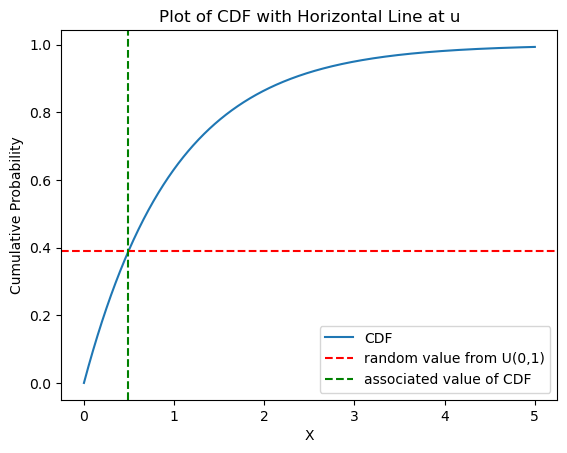

In [200]:
plt.plot(x, cdf, label='CDF')
plt.axhline(u, color='r', linestyle='--', label=f'random value from U(0,1)')
plt.axvline(value, color='g', linestyle='--', label=f'associated value of CDF')
plt.xlabel('X')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.title('Plot of CDF with Horizontal Line at u')
plt.show()

In [203]:
u = 0.93 
value = -np.log(1-u)

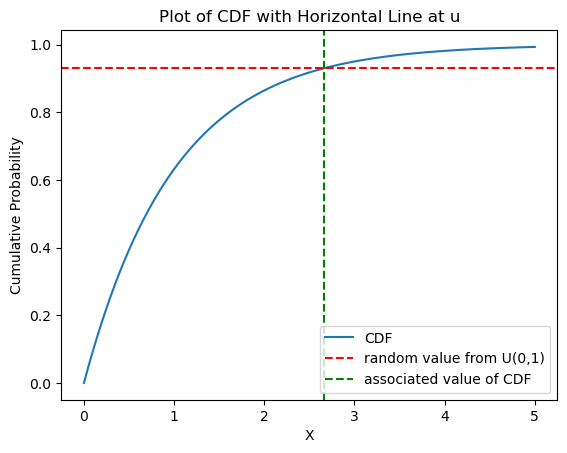

In [204]:
plt.plot(x, cdf, label='CDF')
plt.axhline(u, color='r', linestyle='--', label=f'random value from U(0,1)')
plt.axvline(value, color='g', linestyle='--', label=f'associated value of CDF')
plt.xlabel('X')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.title('Plot of CDF with Horizontal Line at u')
plt.show()

In [205]:
value

2.659260036932779

## The Gomperz distribution

An insurance company has a portfolio of 50,000 life insurance policies. It is not possible to predict
how long each person will live, but is it possible to predict the statistical behavior of this mass of
insured. Actuaries study this phenomenon and have already identified an excellent distribution for the
Lifespan X of adults: the Gompertz distribution that has probability density
$f_X(x)$ given by:




In [206]:
def f(x):
    
    return B*c**x*np.power(np.e, (-B/np.log(c)) *(c**x-1))

For $x \geq 0$, where $B > 0$ and $c \geq 1$ are positive constants that alter the shape of the density function. Clearly, $f(x) = 0$ for $x < 0$ since negative lifetimes do not exist. The cumulative distribution function is given by:
$ F_X(x) = \begin{cases}
1 - e^{-\frac{B(c^x - 1)}{\log(c)}} & \text{for } x \geq 0 \\
0 & \text{for } x < 0
\end{cases}$

Using recent data from a Brazilian insurance company, we can take $ B = 1.02 \times 10^{-4}$ and $c = 1.0855 $.
    - With the parameters $ B$ and $ c $ above, let's check the probability density curve (use values of $ x $ between 0 and 100 years).

In [208]:
B = 1.02e-4
c = 1.0855
x = np.linspace(1, 100, 1000)
pdf = f(x)

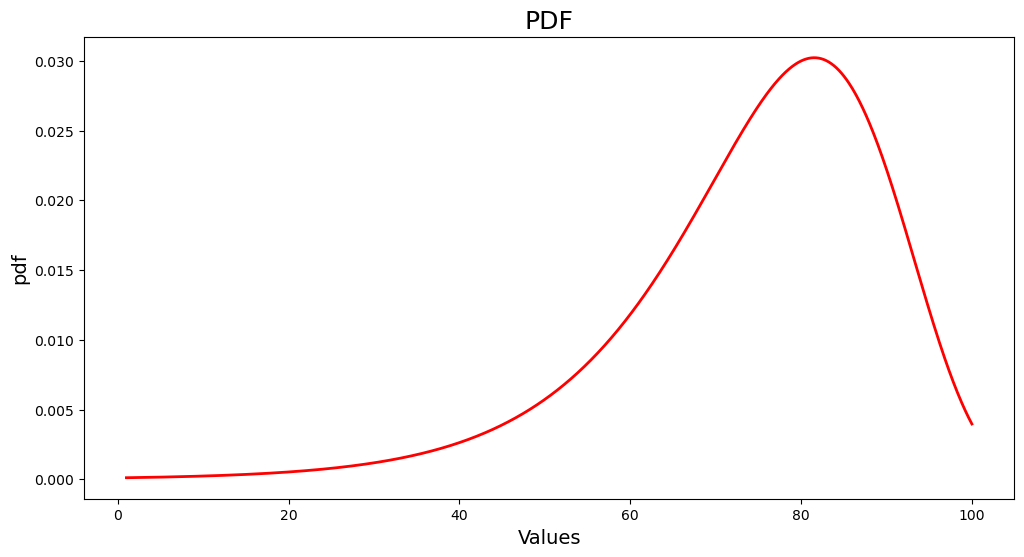

In [210]:
plt.figure(figsize=(12, 6))
plt.plot(x, pdf, 'r', linewidth=2)
plt.title('PDF', fontsize = 18)
plt.xlabel('Values', fontsize = 14)
plt.ylabel('pdf', fontsize = 14)
plt.show()

The CDF is 

$F(x) = 1 - \exp \left( - \frac{B}{\log(c)} (c^x - 1) \right)$


And the inverse is:

$1 - e^{(-B(c^x - 1)} / log(c)) = u$\
$e^{(-B(c^x - 1)} / log(c)) = 1 - u$\
$-B(c^x - 1) / log(c) = log(1 - u)$\
$c^x - 1 = -log(1 - u) * log(c) / B$\
$c^x = 1 - log(1 - u) * log(c) / B$\
$x = log(1 - log(1 - u) * log(c) / B) / log(c)$

In [212]:
def inverse(u):
    
    return np.log(1 - np.log(1 - u) * np.log(c) / B) / np.log(c)

In [213]:
u = np.random.uniform(0, 1, 50000)
x = inverse(u)

Let's calculate P(X > 80|X > 50). That is, calculate
approximately the chance of surviving at least another 30 years given that he reached
50 years old.

In [215]:
greater_50 = np.sum(x>50)
greater_80 = np.sum(x>80)

print("Approximately P(X > 80 | X > 50):", greater_80/greater_50)

Approximately P(X > 80 | X > 50): 0.44569482171344804


The insurance company charges a premium of 2 thousand for a life insurance policy that promises to pay 100 thousand to a beneficiary upon the insured's death. The policy is sold when all 50,000 individuals are born (changing this assumption to adults buying the policy would be cumbersome and does not change the essence of the exercise). The company invests the money at an interest rate of 5% per year, so that in  t years, the 2000 will have grown to 
2×exp(0.05t). If an individual dies early, the company faces a financial loss. If they survive for a long time, their premium will accumulate enough interest to cover the benefit payment.

For the portfolio of 50,000 lives you generated, approximately calculate the probability of loss for the insurance company using Monte Carlo simulation.

In [216]:
premium = 2000
benefit = 100000
interest_rate = 0.05
loss_count = 0

for age in x:
    accumulated_premiums = premium * (np.exp(interest_rate * age) - 1) / interest_rate
    if accumulated_premiums < benefit:
        loss_count += 1

probability_of_loss = loss_count / len(x)

print("Probability of insurance loss:", probability_of_loss)


Probability of insurance loss: 0.0083


## Gaussian

In a Gaussian, $F_X$ don't have an analytical formula. Box and Muller proposed an algorithm very simple to generate gaussians:


if $θ ∼ U(0, 2π)$ and $V ∼ exp(1/2)$, two independent v.a.’s
then $X = √V cos(θ) ∼ N(0, 1)$

In [218]:
def gaussian(n):
    
    return np.sqrt(np.random.exponential(scale=2, size=n)) * np.cos(np.random.uniform(0, 2 * np.pi, size=n))

In [225]:
values = gaussian(10000)
values[:20]

array([ 0.3764064 , -0.36271199,  1.86172514,  0.18829029, -1.31599333,
        0.36936136, -1.70161195, -0.57856065, -2.73005917,  0.57907086,
       -0.20790339,  0.40457692, -0.95303085, -2.30762903, -1.20234238,
        0.24488093, -2.78226852, -0.84323534, -0.47865374,  0.33360102])

In [226]:
x = np.linspace(-3, 3, 1000)
pdf = np.exp(-x**2/2) / np.sqrt(2 * np.pi)

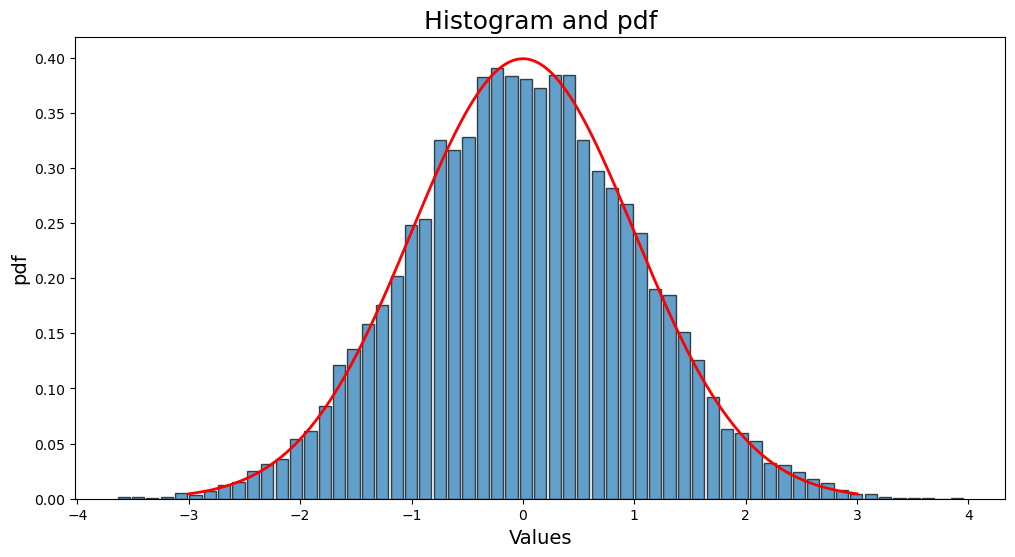

In [227]:
plt.figure(figsize=(12, 6))
plt.hist(values, bins='auto', density=True, alpha=0.7, rwidth=0.85, edgecolor = "black")
plt.plot(x, pdf, 'r', linewidth=2)
plt.title('Histogram and pdf', fontsize = 18)
plt.xlabel('Values', fontsize = 14)
plt.ylabel('pdf', fontsize = 14)
plt.show()

What about a Gaussian with mean = $\mu$ and variance = $\sigma$?

If $ Z \sim N(0, 1) $, then
$ X = \mu + \sigma Z \sim N(\mu, \sigma^2)$

In [240]:
mu = 5
variance = 9

In [241]:
sample = 4 + np.sqrt(variance)*gaussian(10)
sample

array([ 4.94796474, -1.30195684, -0.7263551 ,  3.76538916,  2.7514825 ,
        3.57791248,  3.07575154,  0.97524804,  4.45710767,  6.48535667])

## Estimating integrals by Monte Carlo


Now, we want to calculate $\theta = \int_0^1 g(x)dx$. We can se this integral as a expectation of a random variable. If $U \sim U(0,1)$, so $\theta = E[g(U)]$.

Remembering:

$$ \mathbb{E}[X] = \int_{-\infty}^{\infty} x \cdot f(x) \, dx $$

For the uniform distribution, f(x) = 1.

If $ U_1, U_2, \ldots, U_n $ are i.i.d. $ U(0, 1) $, then the random variables
$$ Y_1 = g(U_1), Y_2 = g(U_2), \ldots, Y_n = g(U_n) $$
are also i.i.d. with expectation $ \theta $.

By the Law of Large Numbers, as $ n \to \infty $,
$$ \frac{1}{n} \sum_{i=1}^{n} Y_i = \frac{1}{n} \sum_{i=1}^{n} g(U_i) \to \mathbb{E}[g(U)] = \theta. $$

Thus, if $ n $ is large, $ \theta $ is approximately the arithmetic mean of the simulated values $ g(u_i) $.

Let's try for:

$\theta = \int_{0}^{1} x^2 \, dx = \frac{1}{3}$


In [2]:
samples = np.random.random(1000)
np.sum(samples**2)/1000

0.33008350346817095

More samples -> more accurate

In [5]:
samples = np.random.random(1000000)
np.sum(samples**2)/1000000

0.33323271607481225

Let's use Monte Carlo simulation to estimate the volume of the ellipsoid defined by
$$ \frac{x^2}{4} + \frac{y^2}{16} + \frac{z^2}{64} \leq 1. $$
You can assume that the ellipsoid is contained within the parallelepiped $ [-1, 1] \times [-2, 2] \times [-4, 4] $. The exact volume is known and equals $ \frac{32}{3} \pi = 33.51 $.


In [6]:
def calculate_volume(n):
    
    inside_points = 0
    
    for _ in range(n):
        x = np.random.uniform(-1, 1)
        y = np.random.uniform(-2, 2)
        z = np.random.uniform(-4, 4)
        
        if x**2 + y**2/4 + z**2/16 <= 1:
            inside_points += 1
    
    volume = 2 * 4 * 8 
    proportion = inside_points / n
    estimated_volume = volume * proportion
    
    return estimated_volume

In [7]:
calculate_volume(1000)

33.6

## Acceptance and rejection method

What if you can't achieve $F(x)$ analytically? The basic idea is to generate from another distribution that is easy. Next, we retain some of the generated values and discard the others. This is done in such a way that the remaining sample has exactly the density f(x).

Let f(x) be the target density and g(x) be the known density. The first thing you should keep in mind is that if f(x) can generate a value x, then g(x) must also be able to generate that same value.

The, we have to find a constant $M > 1$ such that $f(x) \leq M \cdot g(x)$ for every $x$.


We have $ f(x) $ and $ M \cdot g(x) $.
For every $ x $, we define the ratio between the heights as
$r(x) = \frac{f(x)}{M \cdot g(x)} < 1 \quad \text{for every } x.$

Let $ x_1, x_2, \ldots $ be the elements of the sample from $ g(x) $. Which ones should we retain?

Calculate $ r(x_1), r(x_2), \ldots $.
- If $ r(x_i) \approx 0 $, we typically reject $ x_i $
- If $ r(x_i) \approx 1 $, we typically retain $ x_i $

r(x) is the probability of retention

The method works with any $M$ such that $ f(x) \leq M g(x)$.
$M_1$ is much larger than $M_2$, both satisfying the condition.
If we run the method in parallel with both values of $M$, the one with the larger value would reject more frequently than the method with the smaller $M$.
By the theorem, on average, we should select $M$ values before accepting one of them.
The smaller $M$, the less rejection.
It is not difficult to prove that $M$ must be greater than or equal to 1.

Consider the probability density function:
$f(x) = \frac{3}{2}\sqrt{x}, \quad x \in [0, 1]$

Let's write a function to generate random variables with this distribution using:
- the inverse transform method, and
- an acceptance-rejection method using the uniform density to propose values.

We also have to generate 10,000 numbers with each of the two methods and display their results in histograms. How many values from $U(0, 1)$ were needed to generate the 10,000 values using the acceptance-rejection method to achieve the density above?


In [2]:
def pdf(x):
    
    return 3/2 *(np.sqrt(x))

In [3]:
def inverse_method(n):
    p = np.random.uniform(0, 1, n)
    x = (p ** (2/3))
    
    return x

In [16]:
def acceptance_rejection_method(n):
    x = []
    total = 0
    
    while len(x) < n:
        total +=1
        u = np.random.uniform(0, 1)
        v = np.random.uniform(0, 1)*1.6 #ensuring the distritubtion is greater for every x 
        #change the constant above to see the difference, if it is less than 1.5 is a problem
        #if is greater than 1.6 it's ok, but you will need more iterations to get the 10000 samples
        
        if v <= (3/2) * np.sqrt(u):
            x.append(u)
    
    return x, total

In [17]:
inverse = inverse_method(10000)
acceptance, total = acceptance_rejection_method(10000)

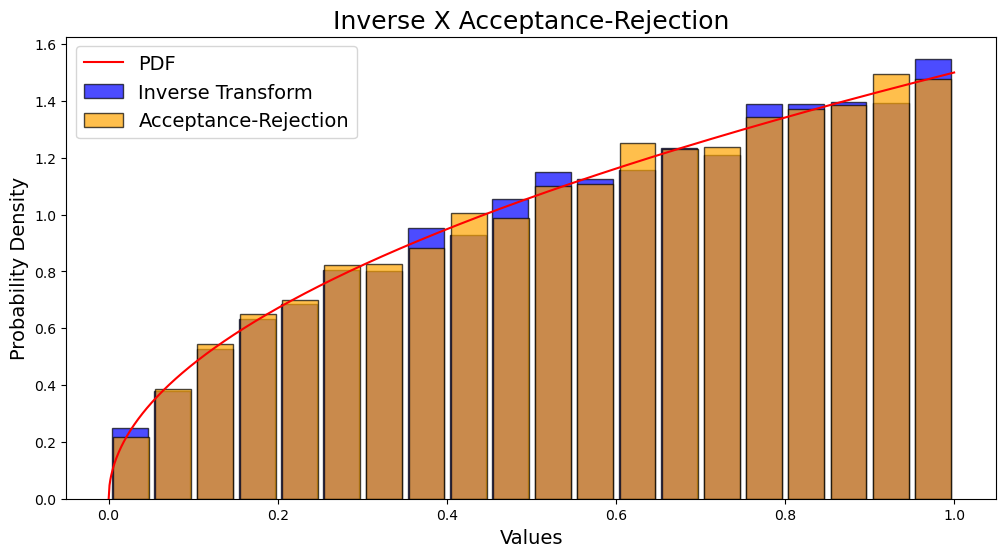

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(np.linspace(0,1,1000), pdf(np.linspace(0,1,1000)), color = 'red', label = "PDF")
plt.hist(inverse, bins= 20, density=True, alpha=0.7, rwidth=0.85, edgecolor = "black", label='Inverse Transform', color ='blue')
plt.hist(acceptance, bins= 20, density=True, alpha=0.7, rwidth=0.85, edgecolor = "black", label='Acceptance-Rejection', color = 'orange')
plt.title('Inverse X Acceptance-Rejection', fontsize = 18)
plt.xlabel('Values', fontsize = 14)
plt.ylabel('Probability Density', fontsize = 14)
plt.legend(fontsize = 14)
plt.show()

In [19]:
total

15985

## Sampling by importance

In importance sampling, we select from g(x) but retain everything, we reject nothing. But when using the sample, we give a different and appropriate weight to each sampled element. In the end, this corrects the distortion of not having a sample of f (x). I think this notebook is already big enough, so I'll just give the main idea using an example

We want to use Importance Sampling to estimate the values associated with X, a r.v with Gama Distribution and parameters α = 3 e β = 2 and the following density:

In [255]:
def f(x):
    result = 4.5 * x**2 * np.exp(-2 * x)
    result[x < 0] = 0                 
    return result

In [256]:
x = np.linspace(-1,5,10000)

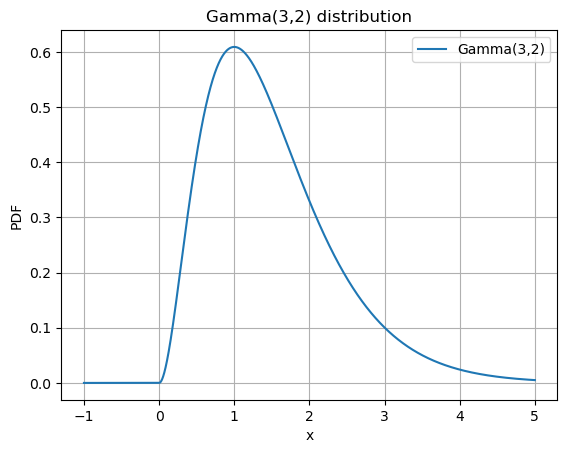

In [257]:
plt.plot(x, f(x), label='Gamma(3,2)')
plt.title('Gamma(3,2) distribution')
plt.xlabel('x')
plt.ylabel('PDF')
plt.legend()
plt.grid(True)
plt.show()

We will use an exponential distribution with λ = 1 to generate our samples.

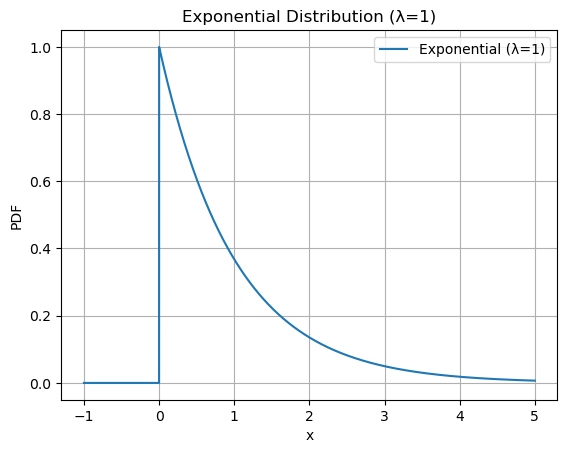

In [258]:
pdf = stats.expon.pdf(x, scale=1)

plt.plot(x, pdf, label='Exponential (λ=1)')
plt.title('Exponential Distribution (λ=1)')
plt.xlabel('x')
plt.ylabel('PDF')
plt.legend()
plt.grid(True)
plt.show()

Let's see the weights associated:

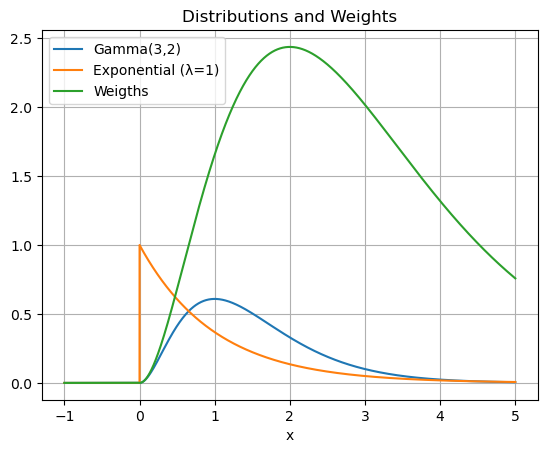

In [259]:
weights = f(x)/np.exp(-x) 

plt.plot(x, f(x), label='Gamma(3,2)')
plt.plot(x, pdf, label='Exponential (λ=1)')
plt.plot(x, weights, label='Weigths')
plt.title('Distributions and Weights')
plt.xlabel('x')
plt.legend()
plt.grid(True)
plt.show()

Let's generate the samples:

In [268]:
lambd = 1

N = 1000000 
U = np.random.uniform(0, 1, N)
Y = -np.log(U) / lambd

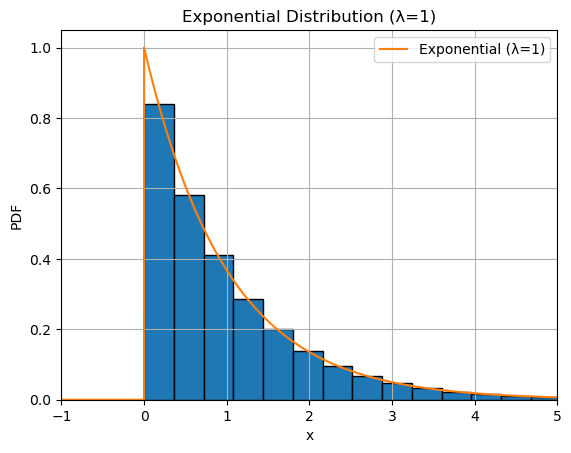

In [269]:
plt.hist(W, bins = 40, density = True, edgecolor = 'black')
plt.plot(x, pdf, label='Exponential (λ=1)')
plt.title('Exponential Distribution (λ=1)')
plt.xlim(-1,5)
plt.xlabel('x')
plt.ylabel('PDF')
plt.legend()
plt.grid(True)
plt.show()

The weigths can be achieved calculating the ratio between the distributions:

$$w(x_i) = \frac{f(x_i)}{g(x_i)} = \frac{4.5 \cdot x² \cdot e^{-2x_i}}{e^{-x_i}}$$
$$w(x_i) = \frac{f(x_i)}{g(x_i)} = 4.5 \cdot x² \cdot e^{-x_i}$$

We will not delve into this, but the constant can be ignored

In [270]:
weights = 4.5 * (Y**2) * np.exp(-Y)  
weights

array([0.21885288, 2.35848017, 2.29028246, ..., 0.85389709, 2.40741937,
       0.02337142])

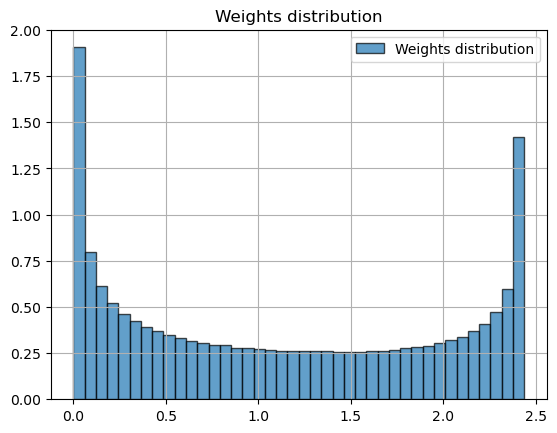

In [272]:
plt.hist(weights, density=True, bins=40, alpha=0.7, label='Weights distribution', edgecolor = 'black')
plt.title('Weights distribution')
plt.legend()
plt.grid(True)
plt.show()

In [273]:
weighted_samples = np.random.choice(Y, size=10000, p=weights / np.sum(weights)) 
weighted_samples

array([0.53592244, 2.91374518, 0.85115342, ..., 2.9914941 , 1.10120854,
       1.14307575])

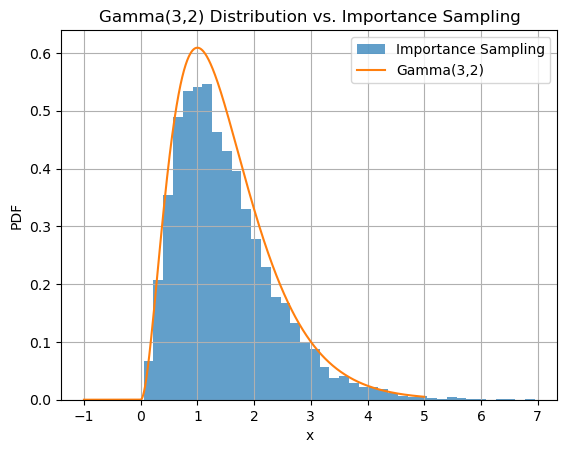

In [274]:
plt.hist(weighted_samples, density=True, bins=40, alpha=0.7, label='Importance Sampling')
plt.plot(x, f(x), label='Gamma(3,2)')
plt.title('Gamma(3,2) Distribution vs. Importance Sampling')
plt.xlabel('x')
plt.ylabel('PDF')
plt.legend()
plt.grid(True)
plt.show()

In [275]:
estimated_mean = np.mean(weighted_samples)
true_mean = alpha / beta

print("Estimated mean (Importance Sampling):", estimated_mean)
print("True mean (analytical):", true_mean)

Estimated mean (Importance Sampling): 1.4884305199539871
True mean (analytical): 1.5
